# 통계량의 분포  

In [ ]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
# 그림 그리기를 위한 코드와 한글 실행
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (8,8)   # 그림 크기 조정

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## 모집단과 표본

이제 앞에서 배운 표본에 대하여 좀 더 자세하게 배워보자. 자료를 수집하고 분석하는 일반적인 절차을 정리해 보자.

- 분석의 목적은 모집단에 대한 특성을 파악하는 것이다. 
- 관심 있는 모집단의 크기가 너무 커서 모든 자료를 조사할 수 없다. 
- 따라서 모집단의 일부분인 표본을 추출한다. 
- 추출한 표본에서 얻은 정보, 즉 표본 통계량를 이용하여 모집단의 특성을 추론한다.


예를 들면 여러분이 흔히 보는 선거 여론조사(opinion survey)는 모든 선거구 주민($P$)의  후보 A에 대한 모집단의 지지율을 알아내는 것이 목적이다. 

관심이 있는 모집단의 특성은 후보 A 에 대한 지지율이다.


$$ \text{모집단 지지율} = \frac{\text{모집단에서 후보 A를 지지하는 사람의 수}}{\text{모집단에 속한 사람의 수}} $$


모든 선거구 주민들에게 질문할 수 없으므로 표본을 추출하고 얻은 표본 지지율로 모집단의 지지율에 대한 정보를 얻는다.

표본 지지율은 표본에서 후보를 지지하는 사람의 수를 표본의 수로 나눈 비율이다.

$$ \text{표본 지지율} = \frac{\text{표본에서 후보 A를 지지하는 사람의 수}}{\text{표본에 속한 사람의 수}} $$

이제 위에서 나온 중요한 용어의 정의와 기호를  정리해 보자.

|  용어  | 기호 |  정의 | 예  |
|:----:|:----:|:----:|:----:|
| 모집단(population) | $P$ | 관심이 있는 전체집단 | 모든 선거구 주민 |
| 모집단의 수  | $N$ | 전체집단에 속한 개체 수 | 모든 선거구 주민의 수 |
|모수(parameter) | $\theta$ | 모집단의 특성값  |  모집단의 지지율 |
| 표본(sample) | $S$ | 모집단의 부분 집합   | 표본으로 추출된 주민 
 | 표본의 수  | $n$ | 표본에 속한 개체 수 | 표본으로 추출된 선거구 주민의 수 |
| 표본 통계량(sample statistics) | $\hat \theta$ | 표본의 특성값 | 표본 지지율| 


일반적으로 통계학에서 표본으로 부터 얻어진 특성 값은 기호의 위에 모자(hat,$\hat{}$)을 붙여주며 이를 표본 통계량 또는 추정량(estimator)라고 부른다. 모집단의 특성을 나타내는 모수(parameter)는 보통 평균, 비율, 중간값, 특정 사건이 일어날 확률 등 분석의 목적에 따라서 다양한 형태로 나타난다. 





## 표본 통계량의 정확한 분포

통계량의 정확한 분포에 대하여 알아보기 위하여 선거 여론조사에 대한 아주 간단한 예를 들어보자




### 모집단 

모집단과 표본에 대한 간단한 예제를 들어보자. 모집단은 다음과 같이 5명의 사람들로 이루어진 집합이라고 하자. 

$$ P = \{ \text{철수, 영이, 둘리, 흥민, 연경} \}, \quad N = 5 $$

관심있는 모수 $\theta$ 는 후보 A에 대한 지지율이다.

$$ \theta = \frac{\text{모집단에서 후보 A를 지지하는 사람의 수}}{\text{모집단에 속한 사람의 수}}  $$

모집단에 속한 5명이 선거 후보 A에 대한 지지 여부를 다음과 같다. 선거 여론조사의 경우 모집단은 선거구 주민인 사람들로 이루어져 있지만 실제로 측정하는 값은 후보를 지지하는지에 대한 여부이다. A 후보를 지지하면 $x=1$, 지지하지 않으면 $x=0$ 이라고 하자

- 철수는 A 후보를 지지한다 ($x=1$)
- 영이는 A 후보를 지지한다 ($x=1$)  
- 둘리는 A 후보를 반대한다 ($x=0$)
- 흥민는 A 후보를 반대한다 ($x=0$)
- 연경는 A 후보를 지지한다 ($x=1$)

위의 경우 모집단 지지율 $\theta$ 은 60%이다.

$$ \theta = \frac{1+1+0+0+1}{5} = \frac{3}{5}= 0.6 $$ 



### 표본 

이제 5명의 모집단에서 단순임의추출로 3명의 표본을 추출하는 경우를 생각해 보자. 물론 비복원 추출이다.

3명의 표본을 추출한 후, 표본에 속한 $i$ 번째 사람이 후보를 지지하면 $x_i=1$, 지지하지 않으면 $x_i=0$ 이라고 하자. 이러한 경우 표본 지지율 $\hat \theta$ 는  추출된 사람들의 관측값 $x_1, x_2,  x_3$의 평균 $\bar x$와 같다.  

$$ \hat \theta = \frac{\text{표본에서 후보 A를 지지하는 사람의 수}}{\text{표본에 속한 사람의 수}} = \frac{\sum_{i=1}^3 x_i }{n} = \bar x $$




 3개의 표본을 추출한다면 나타날 수 있는 모든 가능한 표본은 몇 개일까? $N=5$ 명의 사람들로 구성된 모집단에서 $n=3$ 명의 표본을 추출할 때 모든 가능한 경우는 10가지이다.

$$ {{N}\choose{n}}  ={{5}\choose{3}} = \frac{(5)(4)(3)}{(3)(2)(1)} = 10 $$ 



 라이브러리 `itertools` 에 수록된 함수 `combinations` 를 사용하면 5명의 사람들로 구성된 모집단에서 3명을 임의추출할 때 나타날 수 있는 모든 경우의 표본을 구할 수 있다.함수 `combinations(P, n)` 은 리스트 `P` 에서 고려할 수 있는 `n` 개의 모든 조합을 구해준다.


In [4]:
from itertools import combinations

In [5]:
P = ['철수', '영이', '둘리', '흥민', '연경'] 

N = len(P)
n = 3

all_possible_samples = []

for sample in combinations(P, n):
    all_possible_samples.append(sample)

all_possible_samples

[('철수', '영이', '둘리'),
 ('철수', '영이', '흥민'),
 ('철수', '영이', '연경'),
 ('철수', '둘리', '흥민'),
 ('철수', '둘리', '연경'),
 ('철수', '흥민', '연경'),
 ('영이', '둘리', '흥민'),
 ('영이', '둘리', '연경'),
 ('영이', '흥민', '연경'),
 ('둘리', '흥민', '연경')]

In [6]:
all_possible_num = len(all_possible_samples)
all_possible_num

10

### 모든 가능한 표본의 분포 

모집단에서 실제로 표본을 추출하면  10개의 가능한 표본들 중 하나가 추출될 것이다. 특정한 하나의 표본이 추출될 확률은 얼마인가? 단순임의추출을 사용하였으므로 10개의 가능한 표본들은 추출될 가능성이 모두 같다. 따라서 특정한 표본이 추출될 확률은 $1/10 = 0.1$ 로 모두 동일하다.  

$$ P (\text{철수, 영이, 둘리}) = P (\text{철수, 영이, 흥민}) = \dots = P (\text{둘리, 흥민, 연경}) = \frac{1}{10} = \frac{1}{{{N}\choose{n}}} $$


관심있는 모수는 지지율이이므로 모집단을 사람의 지지 여부를 나타내는 값(숫자)으로 나타내보자. A후보를 지지하면 1, 반대하면 0으로 나타내면 모집단을 다음과 같이 1과 0으로 표시할 수 있다.

$$ P=\{ 1, 1, 0, 0, 1 \} $$

이렇게 1인 3개, 0이 2개인 모집단 $P$ 에서 3개의 숫자 $x_1, x_2, x_3$ 로 구성된 표본 $S$ 를 임의로 추출할 때 가능한 모든 표본을 구하고 각 표본으로 부터 표본 지지율을 구해보자.

예를 들어 표본이  $\{ 철수, 둘리, 연경 \}$으로 추출되면 표본은 다음과 같고 표본 지지율은 2/3 이다.

$$ S = \{ x_1 = 1, x_2 =0, x_3 = 1 \} $$

$$ \hat \theta = \frac{\sum_{i=1}^3 x_i}{3} = \frac{1+0+1}{3} = \frac{2}{3} $$

이제 파이썬 코드를 이용하여 모든 가능한 표본을 관측값 $(x_1, x_2, x_3)$ 로 표시해 보자.

In [7]:
P = np.array([1,1,0,0,1]) 
n=3

all_possible_samples = []
for sample in combinations(P, n):
    all_possible_samples.append(sample)

all_possible_samples

[(1, 1, 0),
 (1, 1, 0),
 (1, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 1),
 (0, 0, 1)]



이제 10개의 가능한 표본에 대하여  표본 지지율 $\hat \theta$로 구성된 벡터 `sample_rate` 에 다음과 같이 유리수로 만들어 보자.

아래 코드에서 사용한 함수 `Fraction(x,y)` 는 분자를 `x`, 분모를 `y` 로 하는 유리수(rational number)를 만들어 준다. 이때 `x`와 `y` 는 모두 정수형 형식이어야 한다. 지지율을 부동소수점이 아닌  유리수로 계산하는 이유는 유리수의 값으로  `groupby` 메소드를 이용하여  그룹화하기 위해서이다. 

$$ \texttt{ Fraction(x,y) } = \frac{x}{y} $$ 


In [8]:
from fractions import Fraction

In [9]:
sample_rate = []

for sample in all_possible_samples:
  sample_rate.append(Fraction(int(sum(sample)),n))

sample_rate

[Fraction(2, 3),
 Fraction(2, 3),
 Fraction(1, 1),
 Fraction(1, 3),
 Fraction(2, 3),
 Fraction(2, 3),
 Fraction(1, 3),
 Fraction(2, 3),
 Fraction(2, 3),
 Fraction(1, 3)]

리스트 `sample_rate` 에 저장된 10개의 표본 지지율이 나타날 확률은 모두 동일하게 0.1 이다. 10개의 표본 지지율과 각 확률 0.1 을 데이터프레임 `sample_rate_dist` 으로 만들자.

In [10]:
sample_rate_dist = pd.DataFrame({'sample_rate':sample_rate, 'probability': np.repeat(1/all_possible_num, all_possible_num)})
sample_rate_dist

,sample_rate,probability
0,2/3,0.1
1,2/3,0.1
2,1,0.1
3,1/3,0.1
4,2/3,0.1
5,2/3,0.1
6,1/3,0.1
7,2/3,0.1
8,2/3,0.1
9,1/3,0.1


### 통계량의 정확한 분포

 함수 `groupby()`를  이용하여 지지율 `sample_rate` 을 이용하여 그룹화 한 후, 각 그룹에 대한  확률 `probability`의 합을 구하자.

이제 우리는 표본 지지율에 대한 정확한 분포를 다음과 같이 구할 수 있다.

| 표본 지지율 ($\hat \theta$) | 1/3 | 2/3 | 1 |
|:-----:|:-----:|:-----:|:-----:|
|확률 (probability)  | 0.3 | 0.6 | 0.1 |

위의 확률분포는 크기가 5인 모집단에서 3개의 표본을 추출하는 경우 관측할 수 있는 표본 지지율의 분포를 나타내는 것이다. 예를 들어 표본 지지율이 $1/3=33.3\%$ 일 확률은 0.3이다.

In [11]:
sample_rate_dist.groupby(by=sample_rate).sum().reset_index().rename(columns = {'index':'표본 지지율'})

,표본 지지율,probability
0,1/3,0.3
1,2/3,0.6
2,1,0.1


이제 좀 더 큰 모집단에 대한 예를 생각해 보자.

선거구에 10,000명의 주민들이 있다고 하자. 10,000 명의 주민들 중에 60%가 A 후보를 지지한다. 만약 10,000명의 주민들 중 100 명을 표본으로 추출하면 표본 지지율의 정확한 분포는 어떻게 나타날까?

위에서 본 예제와 유사하게 모든 가능한 표본을 구하여 각 표본으로 부터 구한 지지율을 구하고 통계량의 정확한  분포를 구해보면 되겠지만 10,000명의 주민들에서 100 명을 추출할 때 가능한 표본의 수는 너무나 크다.  

$$ {{N}\choose{n}} = {{10,000}\choose{100}} $$ 

최근 컴퓨터의 처리 속도가 정말 빨라졌지만 실제로 이러한 큰 수의 조합을 처리하기란 쉬운 일이 아니다. 

## 표본 통계량의 경험적 분포 

위의 예제에서 처럼 모든 가능한 표본의 개수가 너무 많으면 가능한 모든 표본들을 고려하여 관심있는 통계량 $\hat \theta$ 의 정확한 분포를 구하는 것은 거의 불가능하다. 

이런 경우 우리는 가능한 표본을 모두 고려하지 않고 모집단에서 많은 수의 표본을 독립적으로 임의추출하는 모의실험(simulation)을 통하여 추정량의 경험적 분포를 구할 수 있다.



### 모의실험

주민 10,000 명으로 구성된  모집단에서 60%가  A 후보를 지지한다고 가정하고 100명을 표본으로 추출할 때  표본 지지율의 경험적 분포를 다음과 같이 모의실험을 통해서 구할 수 있다.

1. 지지율이 60%인  모집단을 만든다 (1 이 6000개, 0 이 4000개로 이루어진 집합)
2. 모집단에서 100개의 표본을 임의 추출한다.
3. 추출된 표본으로부터 표본 지지율 $\hat \theta$ 을 계산한다.
4.  (2)와 (3)을  B =1000 번 반복한다.


$\hat \theta_i$ 를 $i$ 번째 표본에서 얻은 표본 지지율이라고 한다면 위의 모의실험 절차에서   1000개의 표본 지지율을 얻을 수 있다.  

$$ \hat \theta_1, \hat \theta_2, \dots, \hat \theta_{1000} $$

이렇게 모의실험을 통하여 얻은 **1000개의 표본 지지율의 경험적 분포**는 표본 지지율의 정확한 분포와 
매우 유사하다. 

$$ \text{모의실험을 통한 통계량의 경험적 분포} \approx \text{통계량의 정확한 분포} $$

통계량의 정확한 분포를 쉽게 파악할 수 없는 경우 모의실험을 통해서 통계량의 경험적 분포를 구하고 이를 통계량의 여러 가지 확률적 성질를 알아보는데 사용할 수 있다.   

모의실험의 반복 횟수 $B$ 는 클수록 좋으며 일반적으로 500 이상의 수를 고려한다.   

In [12]:
# 모집단을 만든다.
P = np.concatenate((np.ones(6000), np.zeros(4000)), axis=0)
np.mean(P)

0.6

이제 반복적으로 표본을 추출하고 계산된 표본 지지율을 데이터프레임 `simulation_sample_rate` 에 저장한다. 

함수 `np.random.choice(P, n, replace=False)` 는 리스트 또는 벡터 `P` 에서 `n` 개로 구성된 표본을 비복원추출로 뽑으라는 함수이다.

In [13]:
B = 1000 # 모의실험의 횟수

n = 100  # 표본의 개수

simulation_sample_rate = pd.DataFrame({'표본지지율':np.zeros(B)})

for i in np.arange(B):
  sample = np.random.choice(P, n, replace=False)
  simulation_sample_rate.loc[i,'표본지지율'] = np.mean(sample)

simulation_sample_rate  

,표본지지율
0,0.59
1,0.60
2,0.60
3,0.56
4,0.62
...,...
995,0.54
996,0.60
997,0.60
998,0.57


1000개의 표본 지지율의 경험적 분포는 다음과 같다.

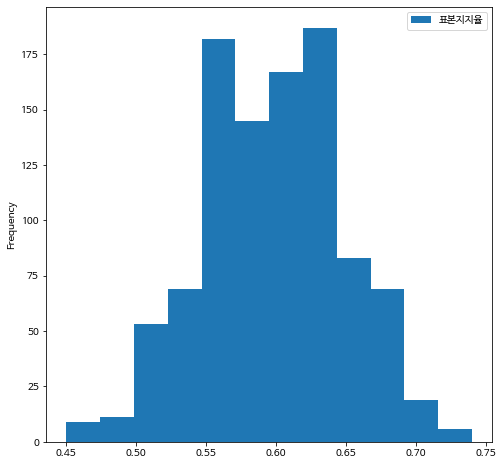

In [14]:
simulation_sample_rate.plot.hist(bins=12)

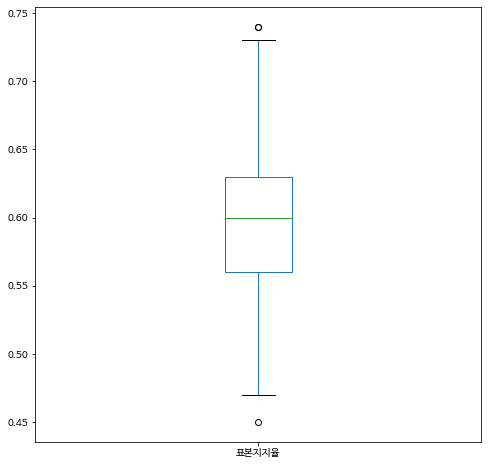

In [15]:
simulation_sample_rate.plot.box()

In [16]:
simulation_sample_rate.describe()

,표본지지율
count,1000.000000
mean,0.598050
std,0.049683
min,0.450000
25%,0.560000
50%,0.600000
75%,0.630000
max,0.740000


### 통계량의 분포

앞 절에서 보았듯이 표본의 개수가 증가하면 표본 평균이 점점 모집단 평균에 더 가까이 접근하는 사실을 알 수 있다. 표본은 임의로 추출하는 것이기 때문에 추출 전에는 어떤 표본이 나올지 알 수 없으며  서로 다른 두 사람이  같은 모집단에서 표본을 추출해도 두 사람의 표본이 같을 가능성은 거의 없다. 즉, 눈 감고 뽑는 임의성(randomness) 때문에 표본은 추출할 때 마다 다른 관측값들이 나온다. 따라서 표본으로 부터 계산한 통계량도 임의성을 가진다. 따라서 **임의성을 가진 표본 통계량은 분포를 가진다.**

표본 통계량의 분포가 왜 중요할까? 앞에서 말한대로 표본 통계량은 임의성을 가지고 있기 때문에 어떤 값이 나올지 예측할 수 없다. 하지만 분포는 관측할 수 있는 값의 가능성을 나타내는 측도이다. 따라서 표본 통계량의 분포를 알고 있다면 우리가 표본 통계량을 이용하여 **모수를 추정하는 방법이 얼마나 합리적인지 판단할 수 있는 근거** 를 제시할 수 있다.

하지만 앞에서 잠깐 언급하였듯이 **표본 통계량의 정확한 분포를 구하는 것은 대부분의 경우 매우 어렵다.** 이러한 이유로 우리는 표본 통계량의 경험적 분포를 구하고 이를 통계량 분포의 특성을 근사적으로 파악하는데 사용한다. 

하지만 표본 통계량의 경험적 분포는 어떻게 알 수 있을까? 이 절에서 우리는 모집단 전체를 알고 있기 때문에 모집단에서 표본을 반복적으로 추출하는 모의실험으로 표본 통계량의 경험적 분포를 구할 수 있다. 
모집단이 어떻게 구성되어 있는지 모르는 경우는 다음 절에서 논의할 것이다. 

모의실험(simulation)은 많은 사람이 독립적으로 모집단에서 표본을 임의로 추출하는 행동을 컴푸터가 대신 실행해주는 것이다.  다시 한번 강조하지만 임의성을 가진 통계량이 어떤 분포에 가지는지 그 성질을 이해하는 것이 중요하며 통계량의 경험적 분포를 파악하기 위하여 모의실험을 사용하는 것이다.      



## 표본평균의 분포: 예제


이제 통계량의 분포에 대한 성질을 더 알아보기 위하여 실제 자료를 이용해 보자. 사용될 자료는 앞 정에서 사용한 것과 동일한 2019년 9월 동안 서울특별시 공공자전거 대여 이력 자료이다. 

이제 우리는 2019년 9월 동안 대여된 공공 자전거를 사용할 때 **이용거리의 평균**을 관심있는 모수로 정한다. 
일단 **데이터프레임 `bike` 는 모집단이다. 즉,  2019년 9월에 발생한 모든 대여 정보를 수록한 자료이므로 모집단이라고 할 수 있다.** 

In [17]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_bike_201909_3.csv"
bike = pd.read_csv(url1, encoding="CP949")

In [18]:
bike.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-17003,2019-09-28 16:10:55,368,SK 서린빌딩 앞,4,2019-09-28 17:03:32,2002,노들역 1번출구,14,52,8940.0
1,SPB-14405,2019-09-28 16:48:16,2024,상도역 1번출구,3,2019-09-28 17:03:44,2002,노들역 1번출구,18,15,1910.0
2,SPB-18431,2019-09-28 16:59:54,2002,노들역 1번출구,10,2019-09-28 17:03:57,2002,노들역 1번출구,10,2,30.0
3,SPB-04853,2019-09-28 15:31:49,207,여의나루역 1번출구 앞,32,2019-09-28 17:10:12,2002,노들역 1번출구,19,98,9610.0
4,SPB-11122,2019-09-28 15:35:41,207,여의나루역 1번출구 앞,14,2019-09-28 17:10:37,2002,노들역 1번출구,18,90,9450.0
5,SPB-23089,2019-09-28 17:02:37,2003,사육신공원앞,5,2019-09-28 17:13:44,2002,노들역 1번출구,10,10,1410.0
6,SPB-15669,2019-09-28 16:17:54,2213,고속터미널역 5번출구 앞,7,2019-09-28 17:14:22,2002,노들역 1번출구,8,56,0.0
7,SPB-09727,2019-09-28 17:04:56,2002,노들역 1번출구,5,2019-09-28 17:17:10,2002,노들역 1번출구,17,11,380.0
8,SPB-10053,2019-09-28 16:59:45,2002,노들역 1번출구,3,2019-09-28 17:17:53,2002,노들역 1번출구,5,17,1080.0
9,SPB-14487,2019-09-28 16:01:41,2024,상도역 1번출구,5,2019-09-28 17:20:44,2002,노들역 1번출구,14,78,13870.0


In [19]:
bike.shape

(407589, 11)


이제 공공자전거 모집단에서  표본을  비복원추출법으로 단순임의추출하는 경우를 생각해 보자. 

공공자전거 모집단의 크기는 $N=407,589$ 으로  상당히 크다.  만약 우리가 추출할 수 있는 표본의 크기가 최대 $n=2000$ 개라면 표본의 크기에 대한 모집단의 크기는 상대적으로 매우 크다. 일반적으로 모집단의 크기가 표본의 크기에 비하여 상대적으로 매우 크면 다음과 같은 점에 유의해야 한다.

- 한 명의 사람이 추출해서 얻은 표본이 다른 사람이 독립적으로 추출한 표본과 일치할 가능성의 거의 없다. 왜냐하면 모집단의 크기가 매우 크기 떄문이다. 407,589 개의 자료에서 두 사람의 표본이 일치할 가능성은 거의 없다(일치할 확률이 0은 아니다, 단지 매우 작아서 무시할 수 있다는 의미이다)

- 모집단의 크기가 매우 크고 표본의 크기가 상대적으로 작은 경우 추출된 자료를 다시 복원하더라도 다시 추출될 확률은 매우 작다. 이러한 경우 비복원추출과 복원추출 방법은 거의 동일한 방법이다. 따라서 비복원추출과 복원추출을 따로 구별할 필요가 없다.  

이제 빅데이터개론2를 수강하는 학생들이  동일한 모집단에서 각자 독립적으로 표본을 추출한다고 생각해 보자. 각자 얻은 표본이 다를 것이고 따라서 표본 통계량도 다르게 나타날 것이다. 추출할 때마다 다르게 나오는 표본 통계량이 어떤 곳에 집중되어 나타나고 얼마나 퍼져서 나타나는지를 나타내는 표본 통계량의 경험적 분포를 구해보자. 이렇게 구한 경험적 분포는  통계량의 정확한 분포와 매우 유사하다.

빅데이터개론2를 수강하는 학생들이 일일이 모집단에서 손으로 표본을 추출할 수 없으니 표본의 추출을 파이썬 프로그램을 이용하여 컴퓨터가 모의실험을 수행할 수 있도록 해보자. 

표본의 개수가 $n=50$ 인 표본을  모의 실험으로 $B=1000$ 개 만든다면 각 표본으로부터 계산한 표본평균의 분포는 어떤 모습일까? 
 
 

In [20]:
B = 1000

sample_means_50 = pd.DataFrame( {'sample_means': np.zeros(B)})

for i in np.arange(B):
  sample_means_50.loc[i,'sample_means'] =bike.sample(n=50, replace=False).이용거리.mean()


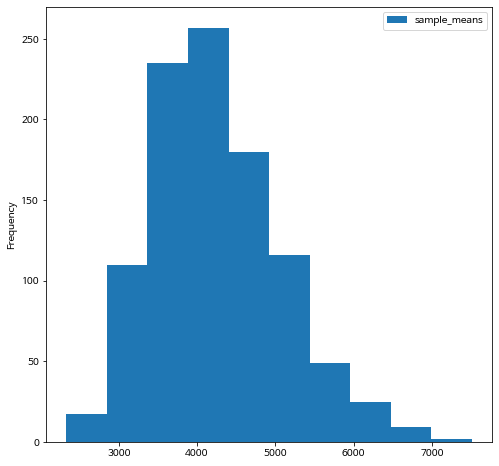

In [21]:
sample_means_50.plot.hist(bins= 10)

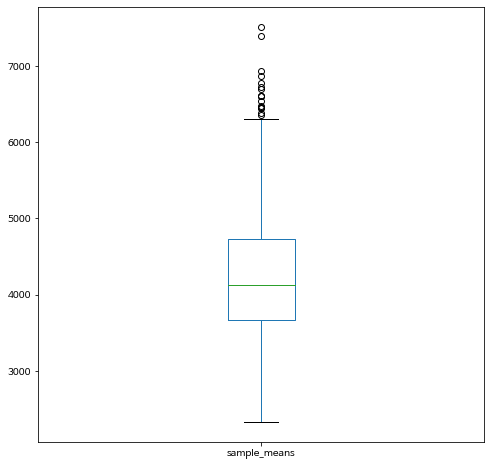

In [22]:
sample_means_50.plot.box()

이제 표본의 개수를 $n=1000$ 개로 늘려서 모의실험으로 $B=1000$ 개의 표본을 추출한 후, 표본 평균들을 구하여 그 분포를 살펴보자. 

In [23]:
sample_means_1000 = pd.DataFrame( {'sample_means': np.zeros(B)})

for i in np.arange(B):
  sample_means_1000.loc[i,'sample_means'] =bike.sample(n=1000, replace=False).이용거리.mean()


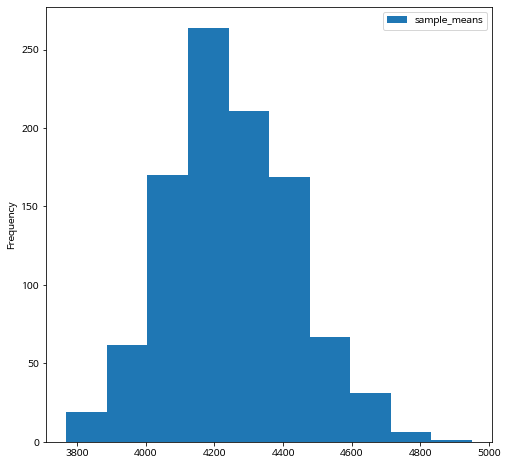

In [24]:
sample_means_1000.plot.hist(bins= 10)

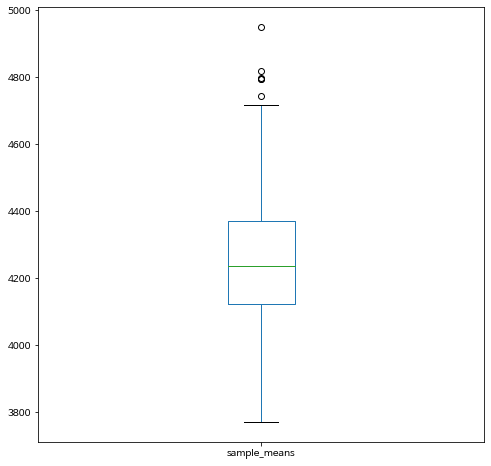

In [25]:
sample_means_1000.plot.box()

이제 표본의 크기가 50개인 격우 표본 평균들의 경험적 분포와 표본의 크기가 1000개인 경우 표본 평균들의 경험적 분포를 상자그림으로 비교해 보자. 가로로 그은 빨간선은 모집단의 평균을 나타낸다.

여러분이 예상할 수 있듯이 표본의 크기가 1000인 경우가 50인 경우보다 표본평균들의 분포가 모집단 주위에 더욱 가깝게 몰려있는 것을 알 수 있다. 또한 표본의 크기가 1000인 경우 표본 평균의 경험적 분포는 좌우 대칭인 종모양으로 나타난다.

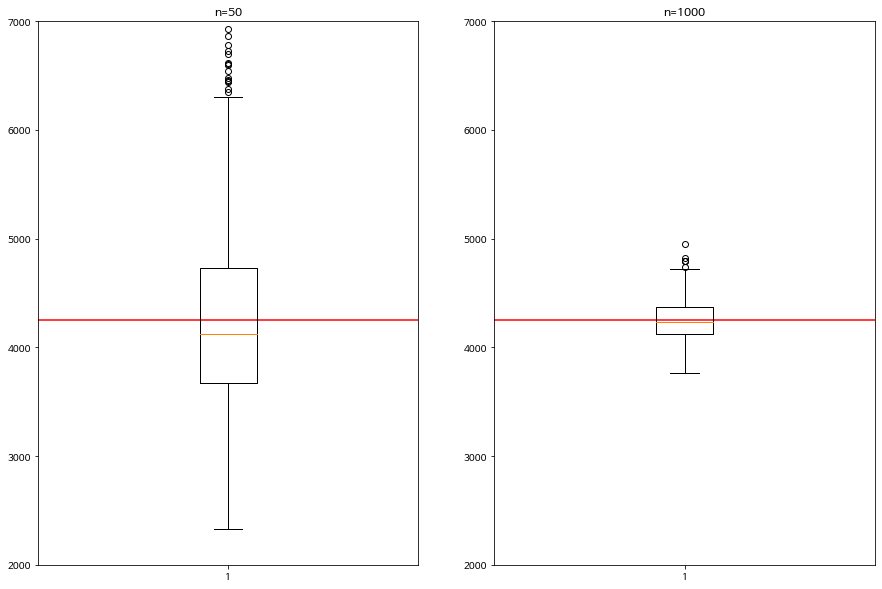

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,10))

axes[0].boxplot(sample_means_50.sample_means)
axes[0].set_ylim(2000,7000)
axes[0].set_title('n=50')
axes[0].hlines(y=4253.336228, xmin=0.5, xmax=1.5, colors='r')

axes[1].boxplot(sample_means_1000.sample_means)
axes[1].set_ylim(2000,7000)
axes[1].set_title('n=1000')
axes[1].hlines(y=4253.336228, xmin=0.5, xmax=1.5, colors='r')

plt.show()

이제 표본의 개수를 점점 크게하면서, 표본 평균들의 경험적 분포가 어떻게 변화하는지 알아보자.  

1. 표본의 개수를 $n=100$ 부터 시작하여 $n=2000$ 까지 점점 증가시킨다. 

2. 주어진 표본의 크기에 대하여 모의실험으로 $B=100$ 개의 표본들을 추출하고 표본 평균들을 구한다. 

3. 표본의 개수에 따른 표본평균들의 분포를 상자그림으로 그려서 비교한다.

참고로 모의실험의 반복 수를 $B=100$ 을 선택한 이유는 반복 수를  $B=1000$ 으로 하면 실행하는데 너무 오랜 시간이 걸리기 떄문이다.

아래 상자그림을 보면 **표본의 개수가 증가할수록** 표본 평균의 경험적 분포가 다음과 같은 성질을 보인다.

-  모집단의 평균 주위에 더 조밀하게 집중된다. 즉, 분포의 퍼진 정도가 줄어든다. 
-  분포의 모양이 좌우가 대칭인 종모양에 가까워 진다.   

여기서 하나 주목할 점은 **모집단의 분포는 종모양과는 전혀 다른 오른쪽으로 꼬리가 긴 비대칭 분포이다.** 하지만 표본 평균의 경험적 분포는 표본의 크기가 증가하면 대칭인 종모양에 가까워 진다. 


여기서 주의할 점은 다음 두 분포를 구별할 수 있어야 한다. 

- 표본의 경험적 분포
- 표본 통계량의 경험적 분포 

우리가 지금 다루고 있는 분포는 표본 통계량의 경험적 분포이다. 앞 절에서 다룬 **표본의 경험적 분포는 표본을 구성하는 관측값들의 분포** 이며 이는 표본이 한 개만 있어도 구할 수 있다. 왜냐하면 표본 안에는 여러 개의 값들이 있기 때문이다. 

표본 통계량은 표본에 속한 관측값들로 계산한 한 개의 값이므로(예를 들어 표본 평균) 분포를 구하려면 표본이 여러 개 필요하다. 이것이 표본 통계량의 경험적 분포를 구하기 위하여 여러 개의 표본을 추출하는 모의실험을 수행하는 이유이다. 

In [27]:
B = 100 # 모의실험의 반복 수 

n = np.array([10,20,50,100]) # 표본의 개수
n = np.append(n, np.arange(200,2101,200)) 

In [28]:
n # 모의실험에서 고려한 표본의 개수들

array([  10,   20,   50,  100,  200,  400,  600,  800, 1000, 1200, 1400,
       1600, 1800, 2000])

In [29]:
sample_means = np. array([])

for samplesize in n:
  for i in np.arange(B):
    sample_means = np.append(sample_means, bike.sample(n=samplesize, replace=False).이용거리.mean())

sample_size = pd.Series(np.repeat(n,B), dtype="category")

df = pd.DataFrame({'sample_size':sample_size, 'sample_mean':sample_means})

In [30]:
df.head(10)

,sample_size,sample_mean
0,10,1394.0
1,10,3784.0
2,10,4496.0
3,10,2850.0
4,10,3571.0
5,10,6980.0
6,10,3135.0
7,10,6254.0
8,10,4083.0
9,10,4690.0


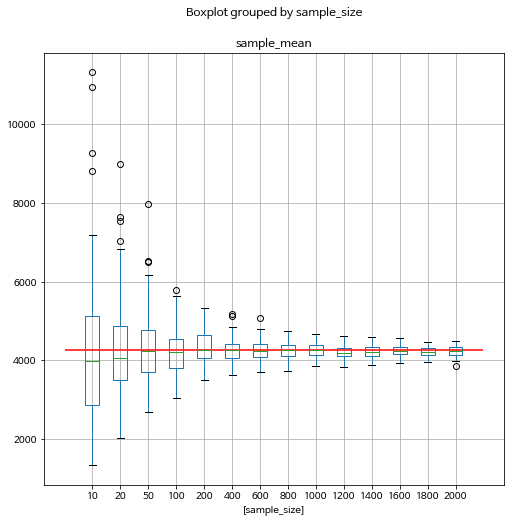

In [31]:
ax = df.boxplot(by='sample_size')
_ = ax.hlines(y=4253.336228, xmin=0, xmax=15, colors='r')
plt.show()



## 정리 


우리는 지금까지 모집단 전체에 대한 정보를 알고 있다고 가정하고 모의실험을 통하여 단순임의추출로 얻은 표본 평균의 경험적 분포가 표본의 개수에 따라서 어떻게 변하는지 살펴보있다. 

표본의 크기가 증가하면 표본 평균의 경험적 분포가 실제 평균 주위에 어떻게 집중되고 얼마나 퍼져서 나타나는지에 대하여 알 수 있었다. 예를 들어 공공자전거 자료에서 이용거리의 평균을 알고 싶을 때를 생각해 보자.  $n=2000$ 개의 표본을 추출하는 경우 모의실험으로 구한 100개의 표본 평균들이 실제 평균 $4253.336228$ 주위에 얼마나 집중되어 있는지 $n=50$ 개의 표본을 추출하는 경우와 비교할 수 있었다. 



이제  **모집단의 정보가 없는 실제 상황** 을 생각해 보자. 만약 우리가 2019년 9월 공공 자전거 대여이력에 대한 전체 자료가 없어서 표본을 추출한다고 가정해 보자. 모집단을 알 수 없으므로 지금까지 우리가 사용한 모의실험을 수행할 수가 없고 표본 평균의 경험적 분포도 알 수 없다.

또한 실제로 데이터를 분석하는 경우 여러 개의 표본이 주어지지 않는다. **표본은 한 번 만 추출할 수 있다**. 실제 상황에서  우리가 얻을 수 있는 것은  1개의 표본과 이를 통해서 얻은 1개의 표본 평균이다.

이렇게 실제 상황에 처한 우리들은 몇 개의 표본을 추출하는게 적절한지, 추출된 표본으로 부터 얻은 표본 통계량이 신뢰할 수 있는지 등 많은 질문에 대한 설득력 있는  대답을 할 수 없을 것 같아 보인다. 


하지만 통계학은 1개의 표본을 얻는다 하더라도 표본의 크기가 어느 정도 크면(약 $n=50$ 개 이상이면) 모집단에 대한 정보가 하나도 없더라도 표본 통계량의 분포를 근사적으로 구할 수 있는 **강력한 무기**를 제공한다.
이 강력하고 유용한 무기를 우리는 **중심극한정리(Central Limit Theorem)** 라고 부르며 다음 절에서 배울 것이다.

마지막으로 꼭 기억해야할 점은 강력하고 유용한 무기인 중심극한정리를 사용하려면 표본이 확률표본(random sample)이어야 한다. 만약 여러분이 편의표본 또는 비확률표본을 가지고 있다면 이 강력한 무기를 사용할 수 없다. 



